<h1 align="center">TITANIC SURVIVAL PREDICTION</h1>
<h3 align="center">Shreyas Naik</h3>

1. Importing the required libraries and the required dataset
2. Data Exploration and Preprocessing
    - Check for Missing Values
    - Visualize Categorical Features
    - Visualize Numerical Features
    - Visualize Relationships Between Features
    - Handle Missing Values
    - Feature Engineering
3. Data Preparation
4. Model Building
    - Random Forest
    - XGBoost
    - Ensemble (Voting)
5. Saving the Model

## Importing the required libraries and the required dataset

In [1]:
!pip install xgboost

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import xgboost as xgb
from imblearn.over_sampling import SMOTE

In [3]:
# Load the dataset
file_path = 'C:/Users/naiks/Downloads/Titanic-Dataset.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Exploration and Preprocessing

In [4]:
# Display the summary of the dataset
print(df.info())

# Get summary statistics
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

### Check for Missing Values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


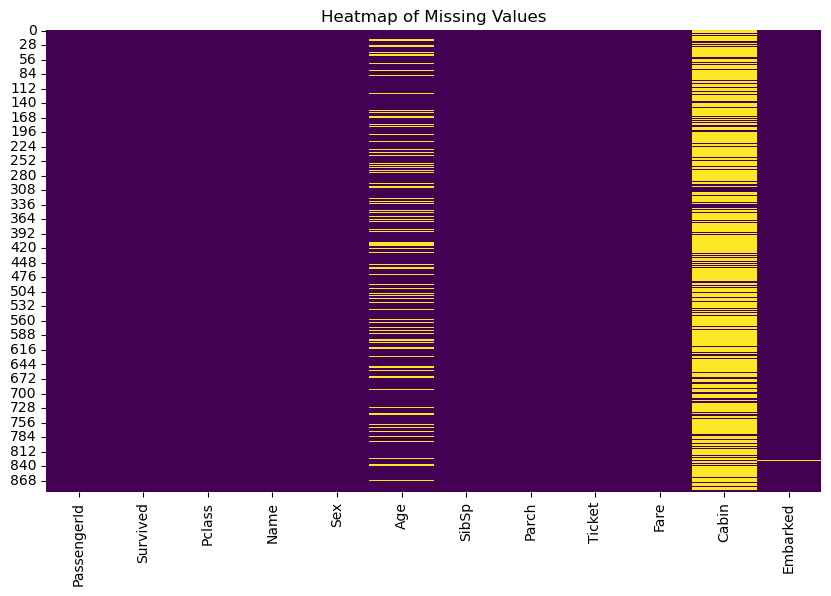

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

### Visualize Categorical Features

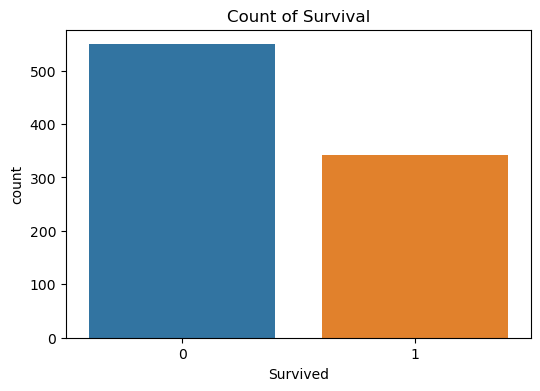

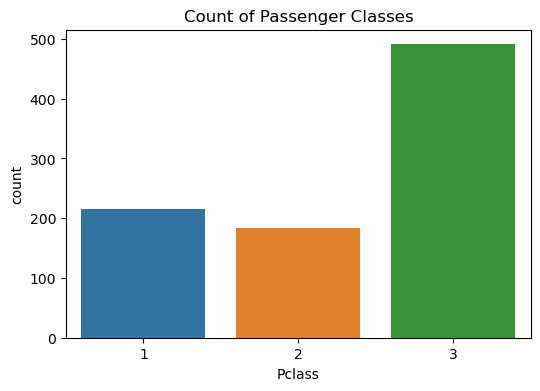

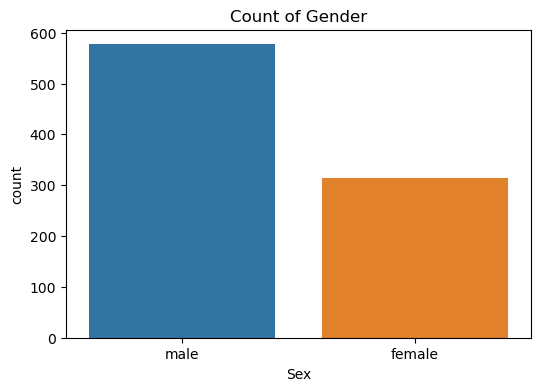

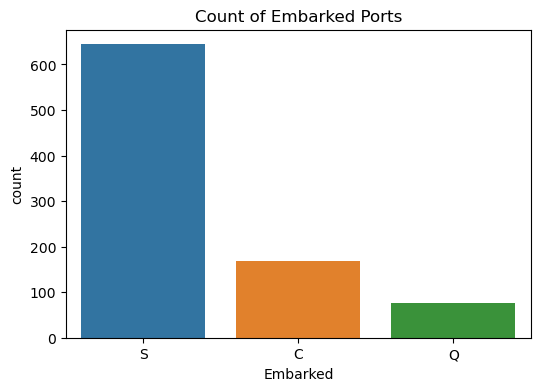

In [6]:
# Count plot for 'Survived'
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Survived')
plt.title('Count of Survival')
plt.show()

# Count plot for 'Pclass'
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Pclass')
plt.title('Count of Passenger Classes')
plt.show()

# Count plot for 'Sex'
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Sex')
plt.title('Count of Gender')
plt.show()

# Count plot for 'Embarked'
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Embarked')
plt.title('Count of Embarked Ports')
plt.show()

### Visualize Numerical Features

C:\Users\naiks\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


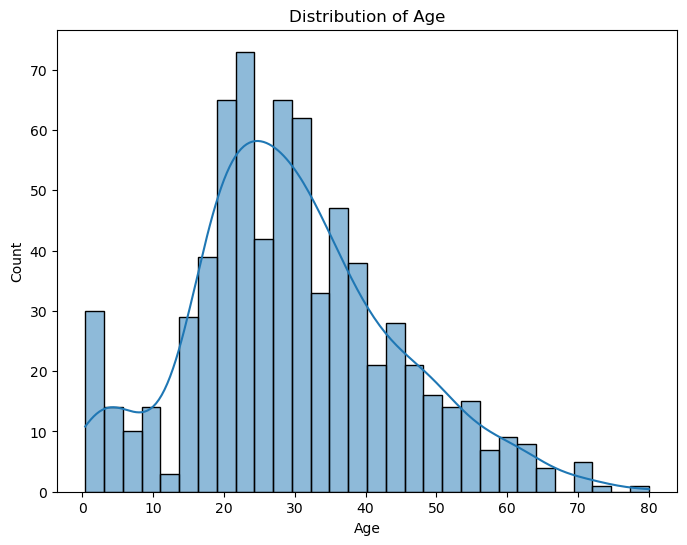

C:\Users\naiks\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


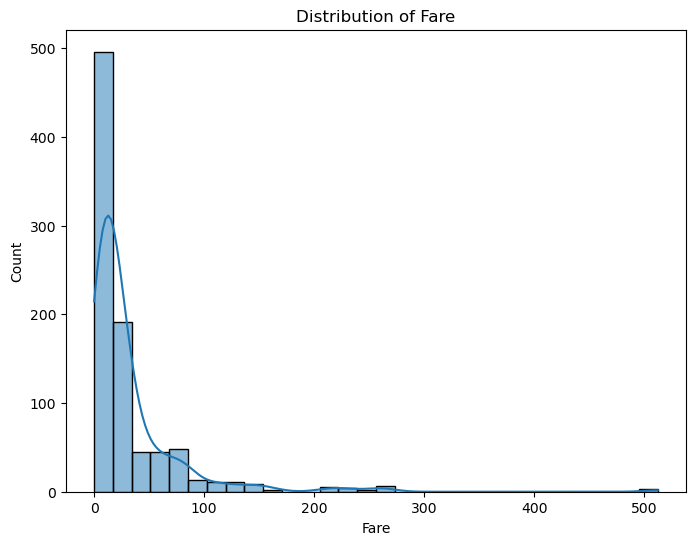

In [7]:
# Histogram for 'Age'
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title('Distribution of Age')
plt.show()

# Histogram for 'Fare'
plt.figure(figsize=(8, 6))
sns.histplot(df['Fare'], kde=True, bins=30)
plt.title('Distribution of Fare')
plt.show()

### Visualize Relationships Between Features

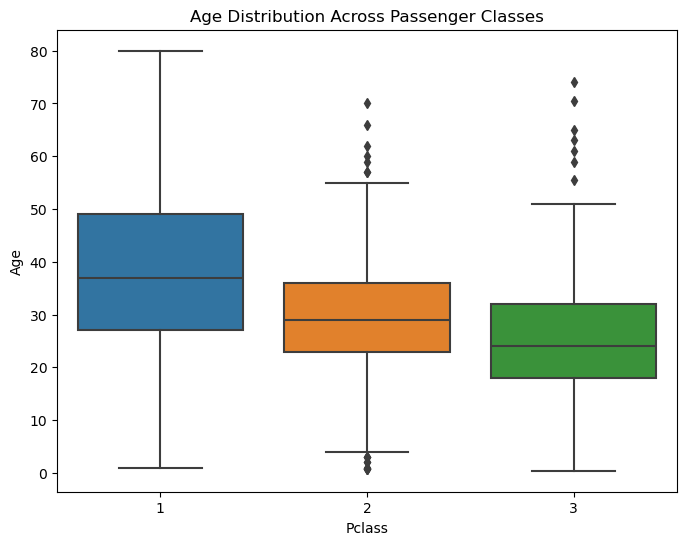

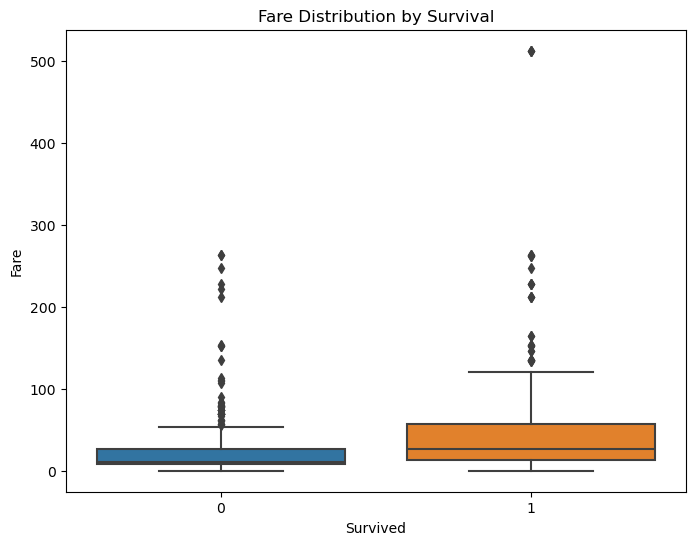

In [8]:
# Box plot for 'Age' vs 'Pclass'
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Pclass', y='Age')
plt.title('Age Distribution Across Passenger Classes')
plt.show()

# Box plot for 'Fare' vs 'Survived'
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Survived', y='Fare')
plt.title('Fare Distribution by Survival')
plt.show()

### Handle Missing Values

In [9]:
# Fill missing values in 'Age' with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing values in 'Embarked' with the mode (most common value)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' column due to too many missing values
df.drop('Cabin', axis=1, inplace=True)

# Verify that there are no more missing values
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


### Feature Engineering

In [10]:
# Convert 'Sex' into numerical values
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Convert 'Embarked' into numerical values
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Create new feature 'FamilySize'
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Create new feature 'IsAlone'
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# Create new feature 'Title' from 'Name'
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
df['Title'] = df['Title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5})
df['Title'] = df['Title'].fillna(0)

# Drop irrelevant columns
df.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

# Display the first few rows of the modified dataset
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title
0,0,3,0,22.0,1,0,7.2500,2,2,0,1
1,1,1,1,38.0,1,0,71.2833,0,2,0,3
2,1,3,1,26.0,0,0,7.9250,2,1,1,2
3,1,1,1,35.0,1,0,53.1000,2,2,0,3
4,0,3,0,35.0,0,0,8.0500,2,1,1,1


## Data Preparation

In [11]:
# Define features and target variable
X = df.drop('Survived', axis=1)
y = df['Survived']

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Building

In [14]:
# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.4f}")

best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


C:\Users\naiks\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\naiks\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 200}
Best Cross-Validation Score: 0.8328


RandomForestClassifier(criterion='entropy', max_depth=5, max_features='auto',
                       n_estimators=200)

In [15]:
# Evaluate with SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
best_model.fit(X_train_smote, y_train_smote)
y_pred_smote = best_model.predict(X_test)
print("Model Accuracy with SMOTE:", accuracy_score(y_test, y_pred_smote))

C:\Users\naiks\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Model Accuracy with SMOTE: 0.8324022346368715


In [16]:
# Advanced models like XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Model Accuracy:", accuracy_score(y_test, y_pred_xgb))

XGBoost Model Accuracy: 0.8100558659217877


In [17]:
# Ensembling with Voting Classifier
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier(**best_params)
svm_clf = SVC()
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting='hard')
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)
print("Ensemble Model Accuracy:", accuracy_score(y_test, y_pred_voting))

Ensemble Model Accuracy: 0.8268156424581006


C:\Users\naiks\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Text(0.5, 1.0, 'Confusion Matrix For Best RandomForest')

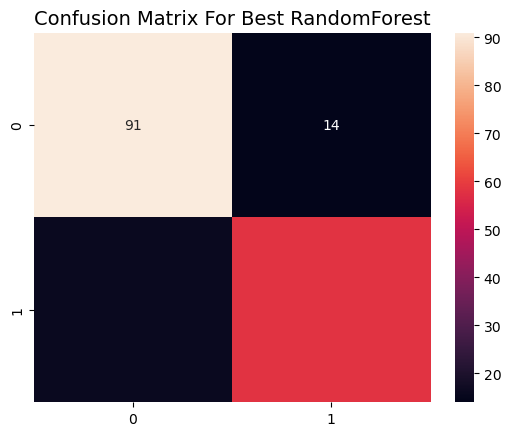

In [18]:
best_pred = best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, best_pred)
sns.heatmap(conf_matrix, annot=True)
plt.title("Confusion Matrix For Best RandomForest", fontsize=14)

Text(0.5, 1.0, 'Confusion Matrix For Best RandomForest')

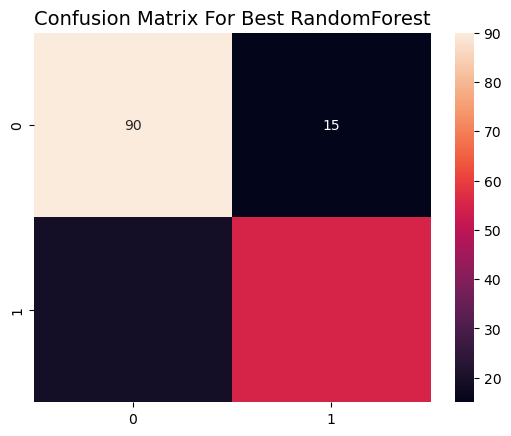

In [19]:
xgb_pred = xgb_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, xgb_pred)
sns.heatmap(conf_matrix, annot=True)
plt.title("Confusion Matrix For Best RandomForest", fontsize=14)

Text(0.5, 1.0, 'Confusion Matrix For Best RandomForest')

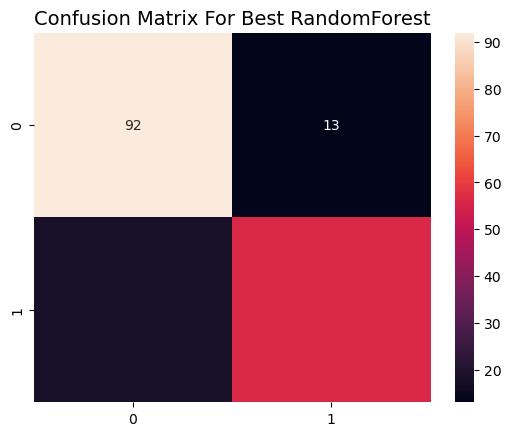

In [20]:
voting_pred = voting_clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, voting_pred)
sns.heatmap(conf_matrix, annot=True)
plt.title("Confusion Matrix For Best RandomForest", fontsize=14)

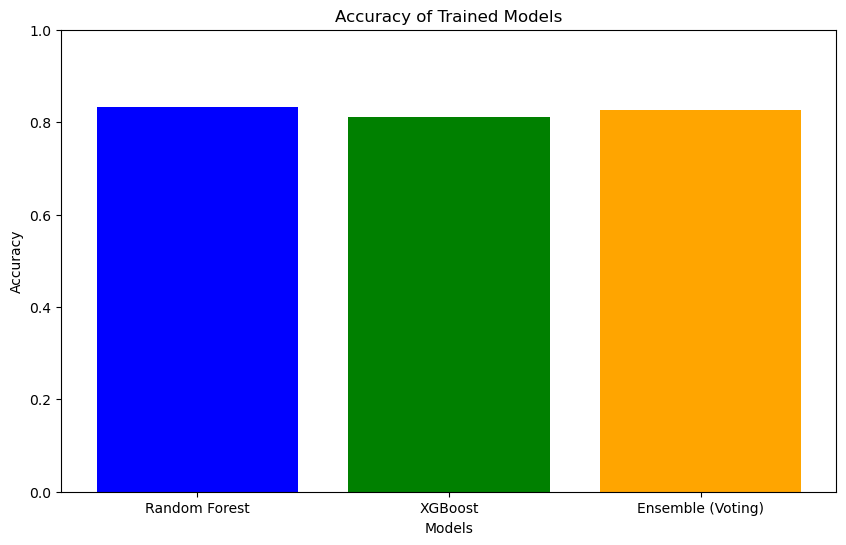

In [21]:
model_names = ['Random Forest', 'XGBoost', 'Ensemble (Voting)']
accuracies = [accuracy_score(y_test, y_pred_smote), accuracy_score(y_test, y_pred_xgb), accuracy_score(y_test, y_pred_voting)]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Trained Models')
plt.ylim(0, 1)  # Limit y-axis from 0 to 1 for clarity
plt.show()

## Saving the model

In [22]:
import pickle

# File path where you want to save the model
model_filename = 'titanic_model.pkl'

# Save the model to a file
with open(model_filename, 'wb') as file:
    pickle.dump(voting_clf, file)

print("Model saved successfully as", model_filename)

Model saved successfully as titanic_model.pkl
